## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Load xor toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


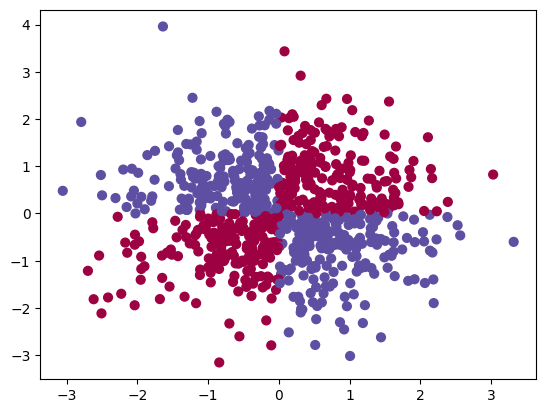

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

Epoch: 0 Loss: 0.6980950801465942
Epoch: 250 Loss: 0.2706734286345493
Epoch: 500 Loss: 0.20854323600024227
Epoch: 750 Loss: 0.1419741041870237

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        97
           1       0.95      0.99      0.97       103

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



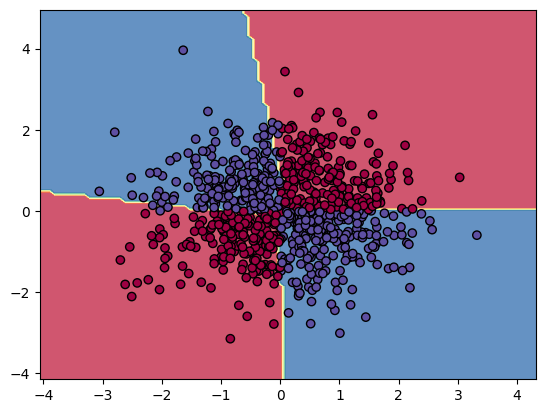

In [13]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def cross_entropy_loss(y_pred, y_true):
    return -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))


# define parameters
input_dim = X_train.shape[1]
hidden_dim = 10  # # of unit/neuron in the hidden layer
output_dim = 1  # binary classification
learning_rate = 0.01
epochs = 1000
batch_size = 32

# weight initialization
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))

# training Loop
for epoch in range(epochs):
    # shuffle the data
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train = X_train[indices]
    y_train = y_train[indices]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size].reshape(-1, 1)

        # forward pass
        z1 = np.dot(X_batch, W1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_pred = sigmoid(z2)

        # calculate loss
        loss = cross_entropy_loss(y_pred, y_batch)

        # backward pass
        dz2 = y_pred - y_batch
        dW2 = np.dot(a1.T, dz2) / batch_size
        db2 = np.sum(dz2, axis=0, keepdims=True) / batch_size

        da1 = np.dot(dz2, W2.T)
        dz1 = da1 * relu_derivative(z1)
        dW1 = np.dot(X_batch.T, dz1) / batch_size
        db1 = np.sum(dz1, axis=0, keepdims=True) / batch_size

        # update weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # check loss for every 100 epochs
    if epoch % 250 == 0:
        print(f"Epoch:", epoch, "Loss:", loss)

# evaluation of test set
z1_test = np.dot(X_test, W1) + b1
a1_test = relu(z1_test)
z2_test = np.dot(a1_test, W2) + b2
y_test_pred = sigmoid(z2_test)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_class))

# visualization with decision boundary

def visual_decision_boundary(model, X, y):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Spectral)
    plt.show()

# model function
def model(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    return (sigmoid(z2) > 0.5).astype(int)

visual_decision_boundary(model, X_train, y_train)


My code implements a two-layer neural network for binary classification. The dataset was split into 800 training points and 200 test points. The model is trained using backpropagation and gradient descent.

The neural network consists of an input layer (2 features), a hidden layer with 10 neurons using ReLU activation, and an output layer with 1 neuron using a sigmoid activation function. The parameters, including weights (W1, W2) and biases (b1, b2), which are initialized randomly following the instruction, and the learning rate is set at 0.01. Training happens over 1000 epochs using a mini-batch size of 32. During each epoch, the training data is shuffled, and a forward pass calculates the activations through the layers. The error is measured with cross-entropy loss, comparing the predictions to the true labels. Backpropagation is then applied to compute gradients for weights and biases, which are updated to minimize the loss.

For evaluation, thresholding at 0.5 is used to classify probabilities into binary outputs.

The result shows that the neural network performed well on the binary classification task. The loss overall consistently decreased over the epochs, starting at 0.7017 and reaching 0.1420 at epoch 750, indicating effective learning during training. The classification report shows an overall accuracy of 97%. The precision, recall, and F1-scores for both classes are above 95%, indicating perfect performance along with the accuracy.

The visualization also shows that the model successfully separated the two classes in the feature space. The four distinct regions show that the network learned the XOR pattern effectively, capturing the non linear relationships. A few overlappings around the decision boundaries may indicate the minor misclassifications.